В наборе данных data.xlsx представлены характеристики банков по показателям: уставной капитал, работающие активы, капитал. Все показатели в млрд. руб. 

1. Распределить банки на группы по величине уставного капитала, по активам, по капиталу, построить гистограммы и полигон частот. Сохранить полученные группировки в виде DataFrame.
2. Определить объемные показатели по каждой группе при группировке по величине уставного капитала: суммарные, средние работающие активы группы, а также размах вариации, среднее линейное отклонение, межквартильный размах внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.
3. Определить объемные показатели по каждой группе при группировке по капиталу: суммарный, средний, медианный  капитал, а также дисперсию, среднее квадратическое отклонение, среднее линейное отклонение от медианного значения, относительные показатели вариации: коэффициент осцилляции, коэффициент вариации внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.
4. Рассчитать средние показатели и показатели вариации по несгруппированным данным: среднее арифметическое, среднее геометрическое, среднее геометрическое, медиана, дисперию, среднее квадратическое отклонение, коэффициент вариации по показателям капитала, уставного капитала, работающих активов. Построить для них диаграмму "ящик с усами" Сделать выводы об однородности статистических совокупностей. Сравнить показатели вариации на несгруппированной совокупности с показателями вариации на сгруппированных совокупностях.
5. Оценить коэффициенты ассиметрии и эксцесса по показателям капитала, уставного капитала, работающих активов.
6. При группировке по величине уставного капитала оценить среднее арифметическое, медианное и модальное значения, сравнить их с соответствующими величинами по несгруппированным данным. Рассчитать среднее квадратическое отклонение по сгруппированным данным. Сравнить его с соответствующим значением, полученным по несгруппированным данным.



In [1]:
#Распределить банки на группы по величине уставного капитала, по активам, по капиталу, построить гистограммы 
#и полигон частот. Сохранить полученные группировки в виде DataFrame.

import pandas as pd
import numpy as np
D=pd.read_excel("data.xlsx")
display(D)

,Номер банка,Капитал,Работающие активы,Уставной капитал
0,1,20.7,11.7,2.4
1,2,19.9,19.8,17.5
2,3,9.3,2.6,2.7
3,4,59.3,43.6,2.1
4,5,24.7,29.0,23.1
5,6,47.7,98.5,18.7
6,7,24.2,25.6,5.3
7,8,7.8,6.2,2.2
8,9,38.3,79.8,6.8
9,10,10.3,10.1,3.5


[17, 6, 4, 3]


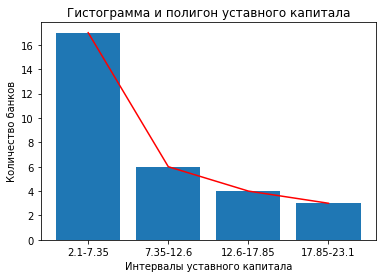

(array([9., 7., 2., 3., 2., 2., 0., 3., 1., 1.]),
 array([ 2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. , 23.1]),
 <BarContainer object of 10 artists>)

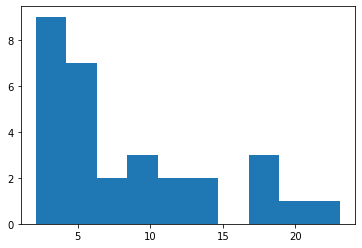

In [2]:
from matplotlib import pyplot as plt
import math
g=np.histogram(D['Уставной капитал'], bins='fd')
arr=[]
for i in range(len(g[1])-1):
    arr.append(str(g[1][i])+'-'+str(g[1][i+1]))
print(list(g[0]))

plt.bar(arr,g[0])
plt.title('Гистограмма и полигон уставного капитала')
plt.xlabel("Интервалы уставного капитала")
plt.ylabel("Количество банков")
plt.plot(arr,g[0],color='red')
plt.show()
plt.hist(D['Уставной капитал'])


In [15]:
#Определить объемные показатели по каждой группе при группировке по величине уставного капитала: 
#суммарные, средние работающие активы группы, а также размах вариации, среднее линейное отклонение, 
#межквартильный размах внутри каждой группы. 
#Результаты расчета оформить в виде DataFrame с его последующим сохранением.
g=np.histogram(D['Уставной капитал'], bins='fd')

D[(g[1][0]<=D['Уставной капитал']) & (D['Уставной капитал']<g[1][1])]['Работающие активы'].mean()
#D[(D['Уставной капитал']>10) & (D['Уставной капитал']<18)]

26.55294117647059

In [3]:
g

(array([17,  6,  4,  3]), array([ 2.1 ,  7.35, 12.6 , 17.85, 23.1 ]))

In [10]:
D[(g[1][0]<=D['Уставной капитал'])& (D['Уставной капитал']<g[1][1])]['Работающие активы'].

21.541300960221125

In [33]:
g = np.histogram(D['Уставной капитал'], bins = 'fd')
newd = pd.DataFrame(columns = ["Sum", "Avg", "R", "d", "imq"])
data=D
for temp in range(len(g[0])):
    tt = data[(g[1][temp]<=data['Уставной капитал']) & (data['Уставной капитал']<g[1][temp + 1])]['Работающие активы']
    Sum = tt.sum()
    Avg = tt.mean()
    R = tt.max() - tt.min()
    d = (tt - tt.mean()).abs().sum() / tt.std()
    imq = (np.quantile(tt, 0.75)) - (np.quantile(tt, 0.25))
    res = pd.Series([Sum, Avg, R, d, imq], index = newd.columns)
    newd = newd.append(res,ignore_index=True)
display(newd)

,Sum,Avg,R,d,imq
0,451.4,26.552941,77.2,12.476717,20.000
1,343.9,57.316667,118.6,4.824295,66.525
2,227.4,56.850000,104.4,2.862816,43.650
3,188.9,94.450000,8.1,1.414214,4.050


In [ ]:
#Определить объемные показатели по каждой группе при группировке по капиталу: суммарный, средний, 
#медианный капитал, а также дисперсию, среднее квадратическое отклонение, среднее линейное отклонение 
#от медианного значения, относительные показатели вариации: коэффициент осцилляции, коэффициент вариации 
#внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.

